# Run AR6-fair for CDR MIP scenarios from AR6.


These are idealised emissions runs using data from Norman initialised using RCMIP values in 1750 and then 400 annual values thereafter for each CDRMIP scenario. 
In this notebook we use the AR6 parameter settings to run a constrained ensemble 
    
    * plot the emissions for some of the pathways
    
    * run the zecmip pathways through FaIR , 
    
    * plot some fields (currently only for the first model) to ensure all is well, 
    
    * output to a csv file.


In [1]:
import fair
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.interpolate import interp1d
from multiprocessing import Pool
from tqdm import tqdm
import json
import pickle
#from climateforcing.twolayermodel import TwoLayerModel
from climateforcing.utils import check_and_download, mkdir_p
import os

In [2]:
# set up plotting
pl.rcParams['figure.figsize'] = (9/2.54, 9/2.54)
pl.rcParams['font.size'] = 12
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['ytick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.right'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True

In [3]:
# Download FaIR params set
check_and_download(
    'https://zenodo.org/record/5513022/files/fair-1.6.2-wg3-params.json', 
    '../data_input/fair_ar6/'
)

In [4]:
with open('../data_input/fair_ar6/fair-1.6.2-wg3-params.json') as f:
    config_list = json.load(f)

In [5]:
len(config_list)



2237

In [6]:
#print(config_list)

In [7]:
for k in config_list[0].keys():
    rt_list = []
    rt_list.append(k)
    print (k, len(k))
   
    

F2x 3
r0 2
rt 2
rc 2
lambda_global 13
ocean_heat_capacity 19
ocean_heat_exchange 19
deep_ocean_efficacy 19
b_aero 6
ghan_params 11
scale 5
C_pi 4
E_pi 4
ghg_forcing 11
aCO2land 8
stwv_from_ch4 13
F_ref_BC 8
E_ref_BC 8
F_solar 7
F_volcanic 10
tropO3_forcing 14
b_tro3 6
ozone_feedback 14
natural 7


In [8]:
rt_list = []
for c in config_list:
    rt_list.append(c['F_solar'])
#print (rt_list[0])
print (len(rt_list[0]))
#print ((rt_list[0]))
#print ((rt_list[1]))

#print(len(rt_list[0]))
    
#print(len(rt_list[0]))
#print(len(rt_list[1]))
#print(rt_list[:][0][0])
#print(rt_list[:][0][0][0])
#print(rt_list[:][0][0][1])
#print(rt_list[:][0][0][0])
#rt_list = []
#for c in config_list:
#    rt_list.append(c['natural'])
#print('natural', len(rt_list[0]))
#pl.plot(np.arange(401), rt_list[:][0], label=r'natural')
#pl.legend(bbox_to_anchor=(0.75, 1), loc='upper left')

361


In [9]:
rt_list = []
for c in config_list:
    rt_list.append(c["natural"])
print(rt_list[0][0])
print(rt_list[0][1])
print(rt_list[1][0])
print(rt_list[1][1])
len(rt_list[:])

[192.9865502785643, 11.137730226696137]
[194.26764846814376, 11.281236291135704]
[192.9865502785643, 11.137730226696137]
[194.26764846814376, 11.281236291135704]


2237

In [10]:
with open('../data_input/fair_ar6/fair-1.6.2-wg3-params.json', "r") as infile:
    all_data = json.load(infile)

    # COULD BE: for data in all_data: ... if you don't want to just see the first index
    #data = all_data[0]
    
    for data in all_data:
        for key in data:
            val = data[key]
            # if the value is a list of length 401
            if type(val) == list and len(val) == 401:
                #print(key)
                # for i in range(400 - len(val)): # IF 401 IS HARD CODED, THIS LINE IS UNNECESSARILY COMPLICATED
                for i in range(40):
                    # add the final value 400 - n times
                    val.append(val[-1])
        #print(data)
            
    with open("fair-1.6.2-wg3-params-extended.json", "w") as outfile:
        # this dumps ALL DATA into the new JSON file
        json.dump(all_data, outfile)
        # alternatively, you can dump only THE EDITED DATA with:
        #json.dump(data, outfile)

# double checks it changes as needed
with open("fair-1.6.2-wg3-params-extended.json", "r") as infile:
    extended_data = json.load(infile)
    print(len(extended_data))
    
    new_rt_list = []
    for c in extended_data:
        new_rt_list.append(c['F_solar'])
    print (len(new_rt_list[0]))

2237
401


In [11]:
with open("fair-1.6.2-wg3-params-extended.json", "r") as infile:
    extended_data = json.load(infile)
    print(len(extended_data))
    
    new_rt_list = []
    for c in extended_data:
        new_rt_list.append(c['F_solar'])
    print ('F_solar',len(new_rt_list[0]))
    
    new_rt_list = []
    for c in extended_data:
        new_rt_list.append(c['F_volcanic'])
    print ('F_volcanic',len(new_rt_list[0]))
    
    new_rt_list = []
    for c in extended_data:
        new_rt_list.append(c['natural'])
    print ('natural',len(new_rt_list[0]))
    
# F2x, r0, rt, rc, lambda_global, ocean_heat_capacity(2 element),
# ocean_heat_exchange, deep_ocean_efficacy, b_aero(several elements), b_tro3(6 elements)
# ghan_params(several), scale(40 plus),C_pi(31),E_pi(40)
# ghg_forcing, aCO2land
# stwv_from_ch4, F_ref_BC, E_ref_BC, tropO3_forcing  
# ozone_feedback
# 
# F_solar, F_volcanic, natural all have 400 values 

2237
F_solar 401
F_volcanic 401
natural 401


In [12]:
print(len(extended_data))

new_rt_list = []
for c in extended_data:
    new_rt_list.append(c['ocean_heat_capacity'])
    
print (len(new_rt_list))
print ( np.min(new_rt_list[1]), np.max(new_rt_list[1]))

2237
2237
9.69154468222165 103.494496927733


In [13]:
print ('original config_list')
print(len(config_list))

new_rt_list = []
for c in config_list:
    new_rt_list.append(c['natural'])
#print (rt_list[0])
print (len(new_rt_list[0]))


original config_list
2237
361


In [14]:
#scenarios = ['constant_forcing', 'constant_emissions', 'zero', 'scenario', 'infrastructure']
#scenarios = ['constant_emissions', 'zero', 'infrastructure', 'scenario']
# zero and constant emissions will be the easy ones, so start with these.

scenarios = ['B1500',
             'B1750',
             'B2000',
             'B2500',
             'OS250_000',
             'OS250_100',
             'OS500_000',
             'OS500_100',
             'OS1000_000',
             'OS1000_100'
            ]

len(scenarios)

10

In [15]:
# Download RCMIP emissions
#check_and_download(
#    'https://zenodo.org/record/4589756/files/rcmip-emissions-annual-means-v5-1-0.csv', 
#    '../data_input/rcmip/'
#)

In [16]:
# Download illustrative pathways
#AR6Pathways = pd.read_csv(
#    '/home/h02/hadcam/github/IllusPathwaysAR6_data/AR6Illus_RCMIP.csv')
    #20210928_ar6emissions_harmonized_infilled_c1_c3_IPs_plus_c2.csv')


#RCMIPhist_data = pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6/plushistRCMIP.csv')

#plushist = pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6/plushistRCMIP.csv')
#plushist_long = pd.melt(plushist, id_vars=['Model', 'Scenario', 'Region', 'Variable', 'Unit', 'Mip_Era', 'Activity_Id'], var_name='Year')
#rcmip_ar6 = pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6/IllusPathsAR6_plushistRCMIP.csv')
#rcmip_ar6_long = pd.melt(rcmip_ar6, id_vars=['Model', 'Scenario', 'Region', 'Variable', 'Unit'], var_name='Year')
#plushist_long.drop(columns=['Mip_Era', 'Activity_Id'], inplace=True)
#rcmip_alldata = pd.concat([plushist_long, rcmip_ar6_long])

#sns.relplot(data=rcmip_alldata, x='Year', y='value', hue='Model')
#g = sns.relplot(data=rcmip_alldata, x='Year', y='value', hue='Model')

#rcmip_alldata.to_csv('/home/h02/hadcam/github/IllusPathwaysAR6/AR6Ilusplus_RCMIPhist.csv')

In [17]:
#new = pd.DataFrame.stack(rcmip_alldata)
#new.to_csv('/home/h02/hadcam/github/IllusPathwaysAR6/AR6Ilusplus_RCMIPhist_wide.csv')

#rcmip_data_wide.to_csv('/home/h02/hadcam/github/IllusPathwaysAR6/AR6Ilusplus_RCMIPhist.csv')

In [18]:
# Download illustrative pathways
#illuspd = pd.read_csv(
#    '/home/h02/hadcam/github/IllusPathwaysAR6/20210928_ar6emissions_harmonized_infilled_c1_c3_IPs_plus_c2.csv')

#ssp_df= pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6_data/CDR_MIP_emissions.csv')
ssp_df= pd.read_csv('/home/h02/hadcam/github/IllusPathwaysAR6_data/ZECMIP_IMPOSE_CDRMIP_emissions.csv')
#fill_years = [str(x) for x in range(2100, 2151)]
#for yr in fill_years:
#    ssp_df.loc[:, yr] = ssp_df[yr].fillna(ssp_df['2100'])

years = np.arange(1750, 2151)
print(len(years))
startyear = 1750
first_scenyear = 2015
last_scenyear = 2150
#years = np.arange(1750, 2151)
#startyear = 1750
#first_scenyear = 2015
#last_scenyear = 2151

first_row = int(first_scenyear-startyear)
print(first_row)
last_row = int(last_scenyear-startyear)
print(last_row)

species = [  # in fair 1.6, order is important
    '|CO2|Energy and Industrial Processes', #'MAGICC Fossil and Industrial',
    '|CO2|AFOLU', #'MAGICC AFOLU'
    '|CH4',
    '|N2O',
    '|Sulfur',
    '|CO',
    '|VOC',
    '|NOx',
    '|BC',
    '|OC',
    '|NH3',
    '|PFC|CF4',
    '|PFC|C2F6',
    '|PFC|C6F14',
    '|HFC|HFC23',
    '|HFC|HFC32',
    '|HFC|HFC43-10', # 'HFC4310mee'
    '|HFC|HFC125',
    '|HFC|HFC134a',
    '|HFC|HFC143a',
    '|HFC|HFC227ea',
    '|HFC|HFC245ca', #'HFC245fa'
    '|SF6',
    '|CFC11',
    '|CFC12',
    '|CFC113',
    '|CFC114',
    '|CFC115',
    '|CCl4',
    '|CH3CCl3',
    '|HCFC22',
    '|HCFC141b',
    '|HCFC142b',
    '|Halon1211',
    '|Halon1202',
    '|Halon1301',
    '|Halon2402',
    '|CH3Br',
    '|CH3Cl',
]

# Assume that units coming out of aneris don't change. One day I'll do unit parsing
unit_convert = np.ones(40)
unit_convert[1] = 12/44/1000
unit_convert[2] = 12/44/1000
unit_convert[4] = 28/44/1000
unit_convert[5] = 32/64
unit_convert[8] = 14/46

data_out = {}
# 'ssp119','ssp126','ssp245','ssp370',ssp434','ssp585''

for scenario in scenarios:
    print(scenario)
    data_out[scenario] = np.ones((401, 40)) * np.nan
    #data_out[scenario] = np.ones((401, 40)) * np.nan
    data_out[scenario][:,0] = years
 
    for i, specie in enumerate(species):
        #print(data_out[scenario].shape,ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),str(startyear):'2014'].shape)
        data_out[scenario][:first_row,i+1] = ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),str(startyear):'2014']*unit_convert[i+1]
        f =  ssp_df.loc[(ssp_df['Region']=='World')&(ssp_df['Scenario']==scenario)&(ssp_df['Variable'].str.endswith(specie)),'2015':'2150'].dropna(axis=1)*unit_convert[i+1]
        #print(f.shape)
        data_out[scenario][first_row:(last_row+1), i+1] = f
        

401
265
400
B1500
B1750
B2000
B2500
OS250_000
OS250_100
OS500_000
OS500_100
OS1000_000
OS1000_100


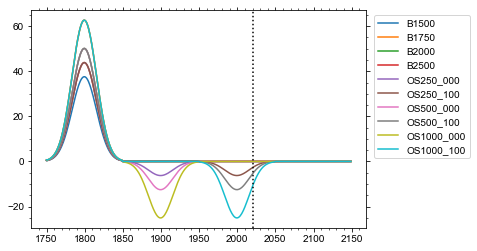

In [19]:
for scenario in scenarios:
    pl.plot(np.arange(1750, 2150), data_out[scenario][0:400,2], label=scenario)    
pl.axvline(2021, ls=':', color='k')
pl.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

# Try the first CDRMIP pathway before looping through the rest of them.

In [20]:
results_out = {}

In [21]:
updated_config = []
for i, cfg in enumerate(extended_data):
    updated_config.append({})
    for key, value in cfg.items():
        if isinstance(value, list):
            updated_config[i][key] = np.asarray(value)
        else:
            updated_config[i][key] = value
    updated_config[i]['emissions'] = data_out['B1500']
    updated_config[i]['diagnostics'] = 'AR6'
    updated_config[i]["efficacy"] = np.ones(45)
    updated_config[i]["gir_carbon_cycle"] = True
    updated_config[i]["temperature_function"] = "Geoffroy"
    updated_config[i]["aerosol_forcing"] = "aerocom+ghan2"
    updated_config[i]["fixPre1850RCP"] = False
    updated_config[i]["scale"][43] = 0.6
    updated_config[i]["F_solar"] = 0.
    updated_config[i]["F_volcanic"] = 0.
    

In [22]:
print (updated_config[i]['emissions'].shape)
print (updated_config[i]['emissions'])

(401, 40)
[[1.75000000e+03 2.59244179e-03 4.91700000e-01 ... 0.00000000e+00
  1.05087730e+02 4.27574490e+03]
 [1.75100000e+03 2.59244179e-03 3.89000000e-01 ... 0.00000000e+00
  1.05087730e+02 4.27574490e+03]
 [1.75200000e+03 2.59244179e-03 4.65800000e-01 ... 0.00000000e+00
  1.05087730e+02 4.27574490e+03]
 ...
 [2.14800000e+03 2.59244179e-03 9.10000000e-03 ... 0.00000000e+00
  1.05087730e+02 4.27574490e+03]
 [2.14900000e+03 2.59244179e-03 1.06000000e-02 ... 0.00000000e+00
  1.05087730e+02 4.27574490e+03]
 [2.15000000e+03 2.59244179e-03 1.06000000e-02 ... 0.00000000e+00
  1.05087730e+02 4.27574490e+03]]


(401, 2)
401
2237


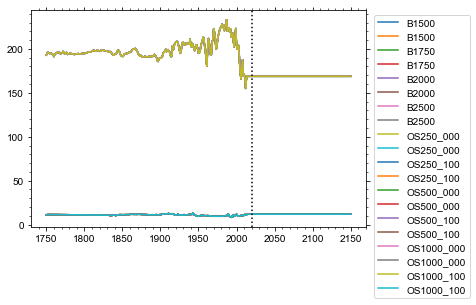

In [23]:
#print(updated_config[i]['natural'])
print (updated_config[i]['natural'].shape)
#print (updated_config[i]['natural'])
print (len(updated_config[i]['natural']))
print (len(updated_config))
for scenario in scenarios:
    pl.plot(np.arange(1750, 2151), updated_config[i]['natural'], label=scenario)    
pl.axvline(2021, ls=':', color='k')
pl.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [24]:
def run_fair(args):
    thisC, thisF, thisT, _, thisOHU, _, thisAF = fair.forward.fair_scm(**args)
    return (thisC[:,0], thisT, np.sum(thisF[:,:43], axis=1), np.sum(thisF[:,35:41], axis=1), np.sum(thisF, axis=1))

if __name__ == '__main__':
    with Pool(28) as pool:
        result = list(tqdm(pool.imap(run_fair, updated_config), total=len(updated_config)))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:22<00:00, 26.99it/s]


In [25]:
len(result[0])

5

In [26]:
len(updated_config)

2237

In [27]:
result_t = np.array(result).transpose(1,2,0)

In [28]:
results_out['B1500'] = {}
c, t, f_ant, f_aer, f_tot = result_t
#temp_rebase = t - t[100:151,:].mean(axis=0)
results_out['B1500']['co2_conc'] = c
results_out['B1500']['temp'] = t
results_out['B1500']['F_ant'] = f_ant
results_out['B1500']['F_aer'] = f_aer
results_out['B1500']['F_tot'] = f_tot

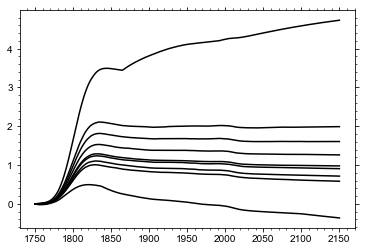

In [31]:
#temp_df = pd.read_csv('../data_input/observations/temp.csv', index_col=0)
#temp_df

for perc in [0,5,10,20,25,50,75,90,100]:
    pl.plot(np.arange(1750,2151),np.percentile(t,perc, axis=1), color='k')


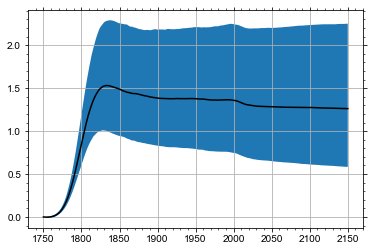

In [32]:
pl.fill_between(np.arange(1750,2151), np.percentile(results_out['B1500']['temp'], 5, axis=1), np.percentile(results_out['B1500']['temp'], 95, axis=1))
pl.plot(np.arange(1750,2151), np.percentile(results_out['B1500']['temp'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
#pl.ylim(0.0, 1.7)
#pl.xlim(1950, 2030)
pl.grid()

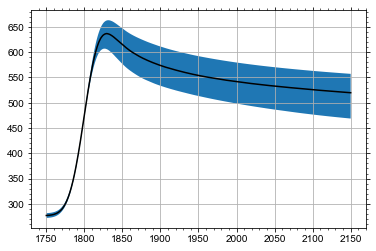

In [33]:
pl.fill_between(np.arange(1750,2151), np.percentile(results_out['B1500']['co2_conc'], 5, axis=1), np.percentile(results_out['B1500']['co2_conc'], 95, axis=1))
pl.plot(np.arange(1750,2151), np.percentile(results_out['B1500']['co2_conc'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
#pl.ylim(0.0, 1.7)
#pl.xlim(1950, 2030)
pl.grid()

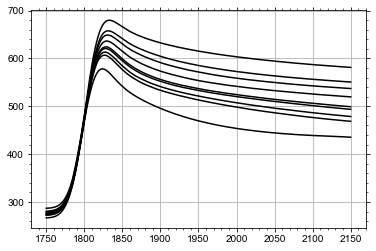

In [34]:
for perc in [0,5,10,20,25,50,75,90,100]:
    pl.plot(np.arange(1750,2151),np.percentile(c,perc, axis=1), color='k')
pl.grid()

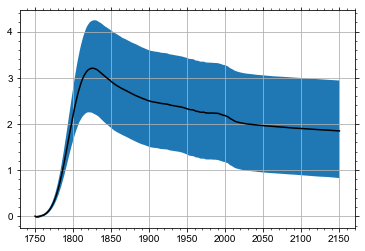

In [35]:
pl.fill_between(np.arange(1750,2151), np.percentile(f_ant, 5, axis=1), np.percentile(f_ant, 95, axis=1))
pl.plot(np.arange(1750,2151), np.percentile(f_ant, 50, axis=1), color='k')
pl.grid()

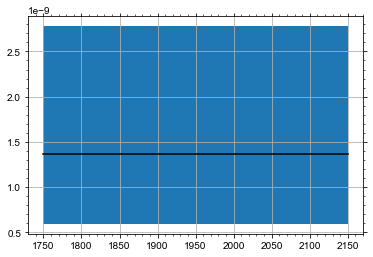

In [36]:
pl.fill_between(np.arange(1750,2151), np.percentile(f_aer, 5, axis=1), np.percentile(f_aer, 95, axis=1))
pl.plot(np.arange(1750,2151), np.percentile(f_aer, 50, axis=1), color='k')
pl.grid()

In [37]:
np.median(results_out['B1500']['temp'], axis=1)[245:265].mean()

1.3457985422393068

In [38]:
# aerosol forcing is a little less negative than in WG3 because we use CEDS-updated not SSP historical
print(
    np.percentile(results_out['B1500']['F_aer'], 5, axis=1)[255:265].mean(),
    np.percentile(results_out['B1500']['F_aer'], 50, axis=1)[255:265].mean(),
    np.percentile(results_out['B1500']['F_aer'], 95, axis=1)[255:265].mean()
)

5.929099200942548e-10 1.3709151022615517e-09 2.7784237387416413e-09


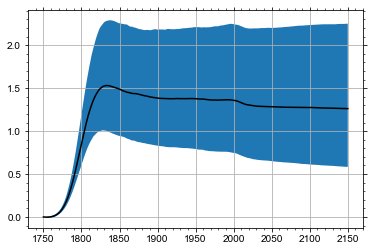

In [39]:
pl.fill_between(np.arange(1750,2151), np.percentile(results_out['B1500']['temp'], 5, axis=1), np.percentile(results_out['B1500']['temp'], 95, axis=1))
pl.plot(np.arange(1750,2151), np.percentile(results_out['B1500']['temp'], 50, axis=1), color='k')
#pl.plot(temp_df.index, temp_df.temp, color='r')
#pl.ylim(0.0, 1.7)
#pl.xlim(1950, 2030)
pl.grid()

# Loop through the other cdrmip pathways

B1500


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:25<00:00, 26.21it/s]


B1750


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:25<00:00, 26.30it/s]


B2000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:24<00:00, 26.44it/s]


B2500


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:24<00:00, 26.33it/s]


OS250_000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:24<00:00, 26.58it/s]


OS250_100


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:24<00:00, 26.34it/s]


OS500_000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:22<00:00, 27.03it/s]


OS500_100


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:24<00:00, 26.52it/s]


OS1000_000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:19<00:00, 28.01it/s]


OS1000_100


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2237/2237 [01:20<00:00, 27.74it/s]


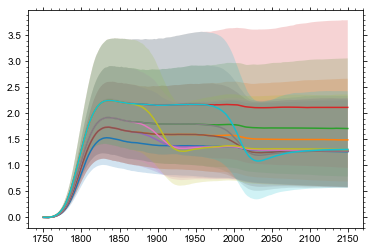

In [40]:
results_out = {}
for scenario in scenarios:
    print (scenario)
    results_out[scenario]={}
    
    updated_config = []
    for i, cfg in enumerate(extended_data):
        updated_config.append({})
        for key, value in cfg.items():
            if isinstance(value, list):
                updated_config[i][key] = np.asarray(value)
            else:
                updated_config[i][key] = value
        updated_config[i]['emissions'] = data_out[scenario]
        updated_config[i]['diagnostics'] = 'AR6'
        updated_config[i]["efficacy"] = np.ones(45)
        updated_config[i]["gir_carbon_cycle"] = True
        updated_config[i]["temperature_function"] = "Geoffroy"
        updated_config[i]["aerosol_forcing"] = "aerocom+ghan2"
        updated_config[i]["fixPre1850RCP"] = False
        updated_config[i]["scale"][43] = 0.6
        updated_config[i]["F_solar"] = 0.
        updated_config[i]["F_volcanic"] = 0.
    
    def run_fair(args):
        thisC, thisF, thisT, _, thisOHU, _, thisAF = fair.forward.fair_scm(**args)
        return (thisC[:,0], thisT, np.sum(thisF[:,:43], axis=1), np.sum(thisF[:,35:41], axis=1), np.sum(thisF, axis=1))

    if __name__ == '__main__':
        with Pool(28) as pool:
            result = list(tqdm(pool.imap(run_fair, updated_config), total=len(updated_config)))
    
    results_out[scenario] = {}
    result_t = np.array(result).transpose(1,2,0)
    c, t, f_ant, f_aer, f_tot = result_t
    temp_rebase = t - t[100:151,:].mean(axis=0)
    temp_rebase_1995_2014 = t - t[245:265,:].mean(axis=0) # subtract 1995-2014 mean  
    
    results_out[scenario]['co2_conc'] = c
    results_out[scenario]['temp'] = t
    #results_out[scenario]['temp'] = temp_rebase
    #results_out[scenario]['temp_2'] = temp_rebase_1995_2014
    results_out[scenario]['F_ant'] = f_ant
    results_out[scenario]['F_aer'] = f_aer
    results_out[scenario]['F_tot'] = f_tot

    pl.fill_between(np.arange(1750,2151), np.percentile(results_out[scenario]['temp'], 5, axis=1), np.percentile(results_out[scenario]['temp'], 95, axis=1),alpha=0.2)
    pl.plot(np.arange(1750,2151), np.percentile(results_out[scenario]['temp'], 50, axis=1))
    pl.grid()
    

B1500


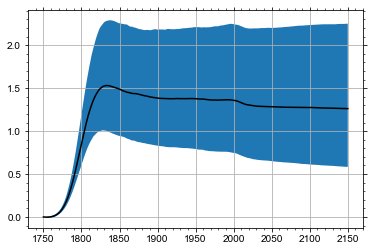

B1750


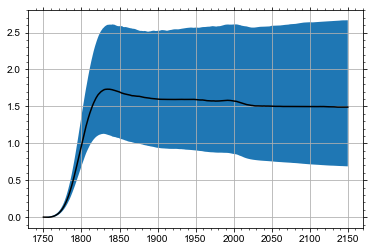

B2000


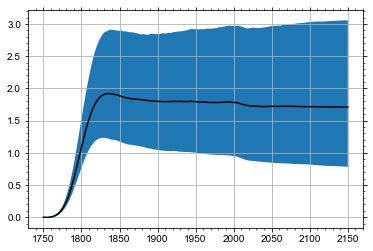

B2500


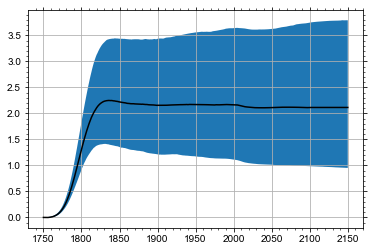

OS250_000


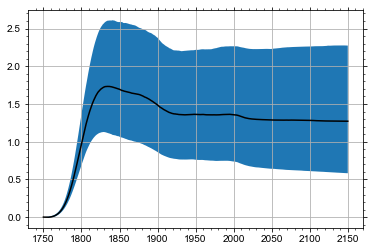

OS250_100


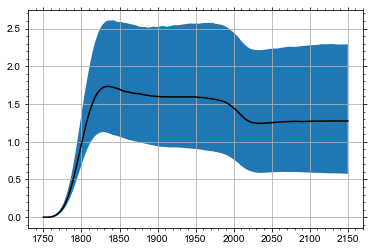

OS500_000


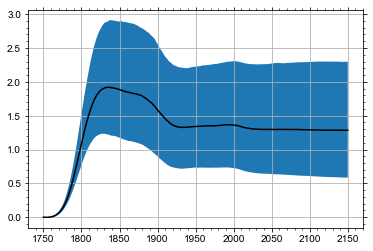

OS500_100


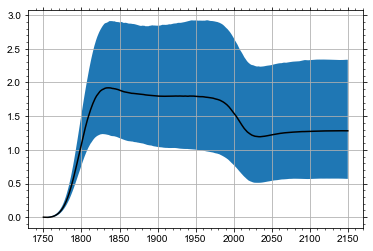

OS1000_000


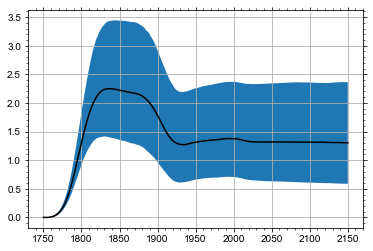

OS1000_100


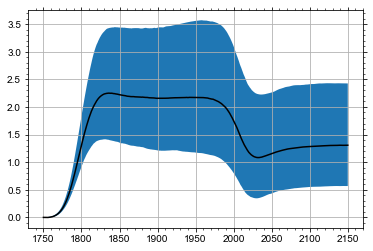

In [41]:
for scenario in scenarios:
    print (scenario)
    pl.fill_between(np.arange(1750,2151), np.percentile(results_out[scenario]['temp'], 5, axis=1), 
                    np.percentile(results_out[scenario]['temp'], 95, axis=1))
    pl.plot(np.arange(1750,2151), np.percentile(results_out[scenario]['temp'], 50, axis=1), color='k')
    #pl.plot(temp_df.index, temp_df.temp, color='r')
    pl.grid()
    pl.pause(5)
   

# All on the same plot!

In [42]:

#B1500       1802.9
#B1750       1995.767
#B2000       1499.667
#B2500       2575.467
#OS250_000   1995.767
#OS250_100   1995.767
#OS500_000   1499.667
#OS500_100   1499.667
#OS1000_000  2575.467
#OS1000_100  2575.467



In [43]:
#LIST OF SCENARIOS:'B1500','B1750','B2000','B2500',
#                  'OS250_000', 'OS250_100',
#                  'OS500_000', 'OS500_100',
#                  'OS1000_000','OS1000_100'


colors = {'B1500':'gold',
          'B1750':'blue',
          'B2000':'cyan',
          'B2500':'red',
          'OS250_000':'blue', 
          'OS250_100':'blue',
          'OS500_000':'cyan', 
          'OS500_100':'cyan',
          'OS1000_000':'red',
          'OS1000_100':'red'
         }

labels = {'B1500':'B1500',
          'B1750':'B1750',
          'B2000':'B2000',
          'B2500':'B2500',
          'OS250_000':'OS250_000', 
          'OS250_100':'OS250_100',
          'OS500_000':'OS500_000', 
          'OS500_100':'OS500_100',
          'OS1000_000':'OS1000_000',
          'OS1000_100':'OS1000_100'
         }

linestyle = {'B1500':'solid',
          'B1750':'solid',
          'B2000':'solid',
          'B2500':'solid',
          'OS250_000':'dashed', 
          'OS250_100':'dotted',
          'OS500_000':'dashed', 
          'OS500_100':'dotted',
          'OS1000_000':'dashed',
          'OS1000_100':'dotted'
            }



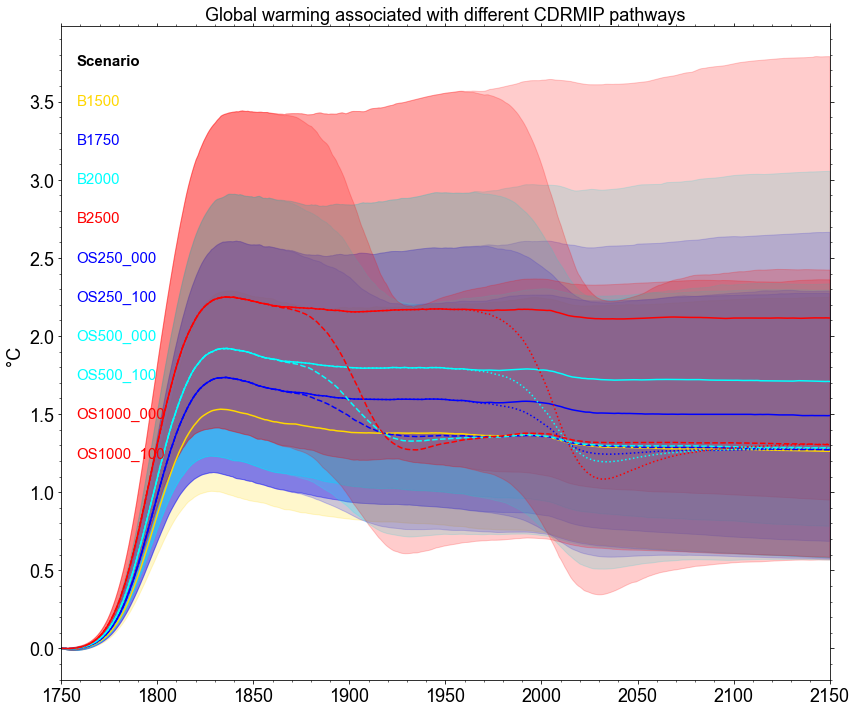

In [45]:
fig, ax = pl.subplots(figsize=(12, 10))

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.text(0.02, 0.94, 'Scenario', fontweight='bold', fontsize=15, transform=ax.transAxes)
for i, scenario in enumerate(scenarios):
    ax.fill_between(np.arange(1750,2151), np.percentile(results_out[scenario]['temp'][0:401,:], 5, axis=1), np.percentile(results_out[scenario]['temp'][0:401,:], 95, axis=1), color=colors[scenario], alpha=0.2)
    ax.plot(np.arange(1750, 2151), np.median(results_out[scenario]['temp'][0:401,:] , axis=1), color=colors[scenario], label=labels[scenario], linestyle=linestyle[scenario])
    ax.text(0.02, 0.88-0.06*i, labels[scenario], color=colors[scenario], transform=ax.transAxes, fontsize=15)
#ax.legend(fontsize=10);
ax.set_ylabel('°C ', fontsize=18);
ax.set_title('Global warming associated with different CDRMIP pathways', fontsize=18);
ax.set_xlim(1750, 2150)
#ax.set_ylim(-0.5, 1.5)

from matplotlib import ticker

#ax1 = ax.twinx()
#positions = np.arange(0.75, 2.76, 0.25)

#ax1.yaxis.set_major_locator(ticker.FixedLocator(positions))

#ax1.set_ylim(0.75,2.75)
#ax1.spines['right'].set_color('gray')
#ax1.tick_params(axis='y', colors='gray')
#ax1.set_ylabel('°C relative to 1850-1900', color='gray', fontsize=18)


#ax.axhline(0, ls=':', color='k', lw=0.5)
#ax1.axhline(1.5, ls='-.', color='k', lw=0.5)
#ax1.axhline(1.75, ls='-.', color='k', lw=0.5)
#ax1.axhline(2.0, ls='-', color='k', lw=0.5)
fig.tight_layout()
pl.savefig('../plots/cdrmip_temps.png', dpi=500, transparent=False)

# All on the same plot CO2 conc!

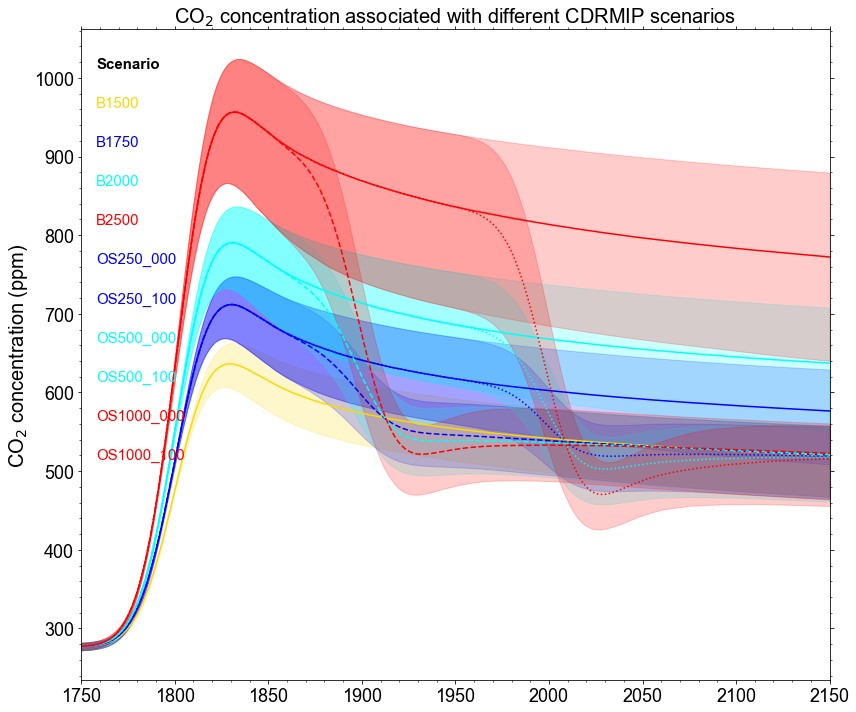

In [46]:
fig, ax = pl.subplots(figsize=(12, 10))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.text(0.02, 0.94, 'Scenario', fontweight='bold', fontsize=15, transform=ax.transAxes)
for i, scenario in enumerate(scenarios):
    ax.fill_between(np.arange(1750,2151), np.percentile(results_out[scenario]['co2_conc'][0:401,:] , 5, axis=1), np.percentile(results_out[scenario]['co2_conc'][0:401,:] , 95, axis=1), color=colors[scenario], alpha=0.2)
    ax.plot(np.arange(1750, 2151), np.median(results_out[scenario]['co2_conc'][0:401,:] , axis=1), color=colors[scenario], label=labels[scenario],linestyle=linestyle[scenario])
    ax.text(0.02, 0.88-0.06*i, labels[scenario], color=colors[scenario], transform=ax.transAxes, fontsize=15)
#ax.legend(fontsize=10);
ax.set_ylabel(r'CO${_2}$ concentration (ppm)', fontsize=20);
ax.set_title(r'CO${_2}$ concentration associated with different CDRMIP scenarios', fontsize=20);
ax.set_xlim(1750, 2150)
#ax.set_ylim(-0.5, 1.5)

fig.tight_layout()
pl.savefig('../plots/cdrmip_CO2conc.png', dpi=500, transparent=False)

# All on the same plot ERF!

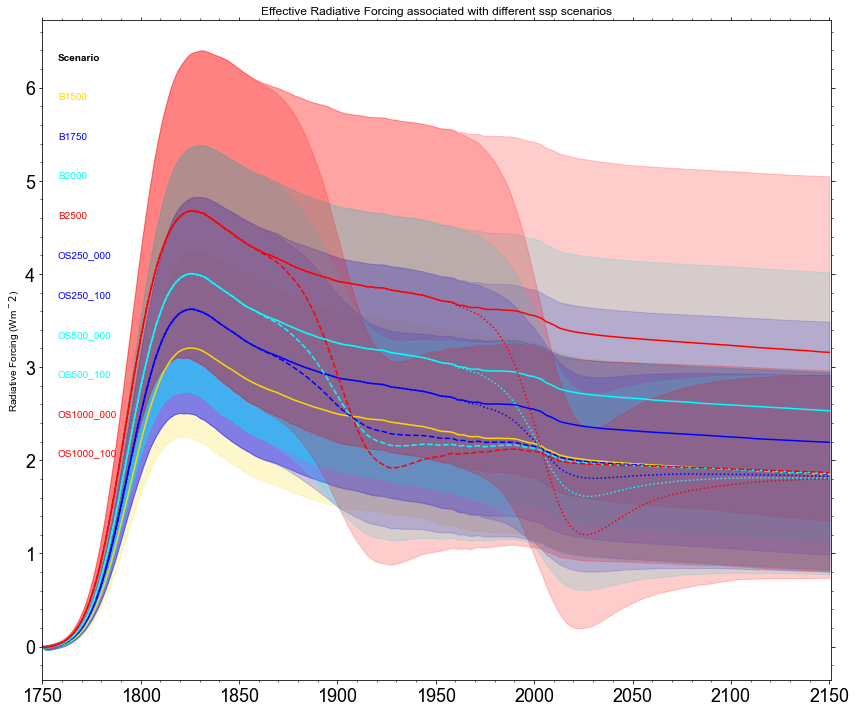

In [47]:
fig, ax = pl.subplots(figsize=(12, 10))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.text(0.02, 0.94, 'Scenario', fontweight='bold', fontsize=10, transform=ax.transAxes)
for i, scenario in enumerate(scenarios):
    ax.fill_between(np.arange(1750,2151), np.percentile(results_out[scenario]['F_tot'][0:401,:] , 5, axis=1), np.percentile(results_out[scenario]['F_tot'][0:401], 95, axis=1), color=colors[scenario], alpha=0.2)
    ax.plot(np.arange(1750, 2151), np.median(results_out[scenario]['F_tot'][0:401,:] , axis=1), color=colors[scenario], linestyle=linestyle[scenario],label=labels[scenario])
    ax.text(0.02, 0.88-0.06*i, labels[scenario], color=colors[scenario], transform=ax.transAxes, fontsize=10)
#ax.legend(fontsize=10);
ax.set_ylabel(r'Radiative Forcing (Wm${^-2}$)');
ax.set_title('Effective Radiative Forcing associated with different ssp scenarios');
ax.set_xlim(1750, 2151)
#ax.set_ylim(-0.5, 1.5)

fig.tight_layout()
pl.savefig('../plots/cdrmip_erf.png', dpi=500, transparent=False)

In [48]:
# Output to csv, first create a dataframe 
model_archive = '../csv_FaIRoutputfiles/'
print (scenarios)
print 

if os.path.isdir(model_archive):
    print("Item already exists")
else:
    os.mkdir(model_archive)
    print ("Making the model directory")
    
#model_dir = model_archive+scenario+'/'
    

for scenario in scenarios:
    for variable in results_out[scenario].keys():
        years = 1750+np.arange(len(results_out[scenario][variable]))
        header_text = np.insert(years, 0, 0)
        dic = results_out[scenario][variable]
        
        
        IMPs = {'B1500':'B1500',
          'B1750':'B1750',
          'B2000':'B2000',
          'B2500':'B2500',
          'OS250_000':'OS250_000', 
          'OS250_100':'OS250_100',
          'OS500_000':'OS500_000', 
          'OS500_100':'OS500_100',
          'OS1000_000':'OS1000_000',
          'OS1000_100':'OS1000_100'
                }
        
        
        filename='../csv_FaIRoutput_AllCDRMIP/cdrmip_'+IMPs[scenario]+'_'+variable+'_csv'
        print(filename)
        pd.DataFrame(dic).T.reset_index().to_csv(filename, header=header_text, index=False)

['B1500', 'B1750', 'B2000', 'B2500', 'OS250_000', 'OS250_100', 'OS500_000', 'OS500_100', 'OS1000_000', 'OS1000_100']
Item already exists
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1500_co2_conc_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1500_temp_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1500_F_ant_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1500_F_aer_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1500_F_tot_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1750_co2_conc_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1750_temp_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1750_F_ant_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1750_F_aer_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B1750_F_tot_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B2000_co2_conc_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B2000_temp_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B2000_F_ant_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B2000_F_aer_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B2000_F_tot_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B2500_co2_conc_csv
../csv_FaIRoutput_AllCDRMIP/cdrmip_B25